# Data Exploration #
For learning to work with xarray and NetCDF files, starting with a control run timeseries for SST.

In [4]:
import xarray as xr
import numpy as np

In [48]:
rootdir = '/local/projects/so_predict/esm2m_froelicher/'
subdir = 'CTRL'
var = 'SST'

# filename = 'sst_0001.nc'
# path = rootdir+subdir+'/'+var+'/'+filename
# ds = xr.open_dataset(path)

ds = xr.open_mfdataset(rootdir+subdir+'/'+var+'/'+'sst_*.nc')

/home/bbuchovecky/miniconda3/envs/hmei/lib/python3.9/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [6]:
# fileprefix = 'sst_'
# filenum = np.arange(1,301,1)   

# for year in filenum:
#     filename = fileprefix + format(year, '04')

In [72]:
ds

<xarray.Dataset>
Dimensions:     (nv: 2, time: 3600, xt_ocean: 360, xu_ocean: 360, yt_ocean: 200, yu_ocean: 200)
Coordinates:
    geolat_c    (yu_ocean, xu_ocean) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    geolat_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    geolon_c    (yu_ocean, xu_ocean) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    geolon_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0001-01-16 12:00:00 ... 0300-12-16 12:00:00
  * xt_ocean    (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * xu_ocean    (xu_ocean) float64 -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * yt_ocean    (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 87.5 88.5 89.5
  * yu_ocean    (yu_ocean) float64 -81.0 -80.0 -79.0 -78.0 ... 88.0 89.0 90.0
Data variables:
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(12,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(12,), meta=np.ndarray>
    sst         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(12, 200, 360), meta=np.ndarray>
    time_bnds   (time, nv) timedelta64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Attributes:
    filename:   ocean.000101-000512.sst.nc
    title:      ESM2M_pi-control_topaz_C3_verona_NEWDIAG_V4
    grid_type:  mosaic
    grid_tile:  1
    history:    Sun Dec 22 16:11:24 2019: ncks -4 -L 1 -a -O decadal_predicti...
    NCO:        netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net,...

In [71]:
def compute_month_climatology(x, var):
    return x[var].groupby('time.month').mean()

In [67]:
sst_climatology = compute_month_climatology(ds, 'sst')

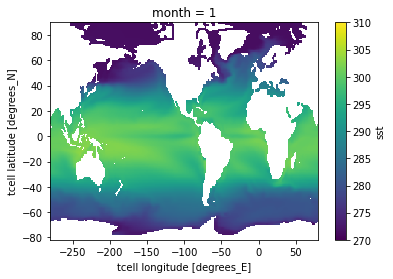

In [74]:
jan_sst_plt = sst_climatology.isel(month=0).plot(vmin=270, vmax=310)

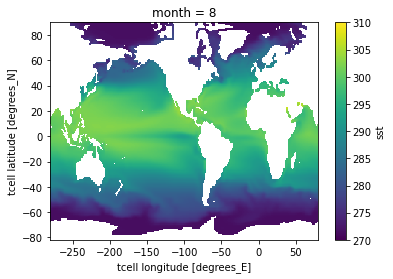

In [73]:
aug_sst_plt = sst_climatology.isel(month=7).plot(vmin=270, vmax=310)

In [94]:
# compute anomalies

# years = np.arange(1,300,12)

# for year in range(1,301):
#     ds.isel(time=year) - sst_climatology
# ds.isel(time=250)

array([  1,  13,  25,  37,  49,  61,  73,  85,  97, 109, 121, 133, 145,
       157, 169, 181, 193, 205, 217, 229, 241, 253, 265, 277, 289])

In [81]:
sst_climatology

<xarray.DataArray 'sst' (month: 12, yt_ocean: 200, xt_ocean: 360)>
dask.array<stack, shape=(12, 200, 360), dtype=float32, chunksize=(1, 200, 360), chunktype=numpy.ndarray>
Coordinates:
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12